<a href="https://colab.research.google.com/github/sandeep92134/PYTHON-Data-Cleaning/blob/master/Chapter%205/Exersize%202.%20Using%20boxplots%20to%20identify%20outliers%20for%20continuous%20variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import pandas as pd
 import matplotlib.pyplot as plt
 nls97 = pd.read_csv("https://raw.githubusercontent.com/sandeep92134/PYTHON-Data-Cleaning/master/Chapter%205/datasets/nls97.csv")
 nls97.set_index("personid", inplace=True)
 covidtotals = pd.read_csv("https://raw.githubusercontent.com/sandeep92134/PYTHON-Data-Cleaning/master/Chapter%205/datasets/covidtotals.csv", parse_dates=["lastdate"])
 covidtotals.set_index("iso_code", inplace=True)

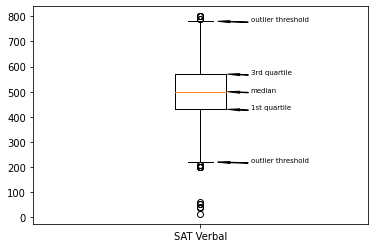

In [2]:
 nls97.satverbal.describe()
 plt.boxplot(nls97.satverbal.dropna(), labels=['SAT Verbal'])
 plt.annotate('outlier threshold', xy=(1.05,780), xytext=(1.15,780), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
 plt.annotate('3rd quartile', xy=(1.08,570), xytext=(1.15,570), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
 plt.annotate('median', xy=(1.08,500), xytext=(1.15,500), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
 plt.annotate('1st quartile', xy=(1.08,430), xytext=(1.15,430), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
 plt.annotate('outlier threshold', xy=(1.05,220), xytext=(1.15,220), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
 #plt.annotate('outlier threshold', xy=(1.95,15), xytext=(1.55,15), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
 plt.show()

In [3]:
 weeksworked = nls97.loc[:, ['highestdegree','weeksworked16', 'weeksworked17']]
 
 weeksworked.describe()

,weeksworked16,weeksworked17
count,7068.000000,6670.000000
mean,39.127476,39.016642
std,21.336629,19.465974
min,0.000000,0.000000
25%,23.000000,37.000000
50%,53.000000,49.000000
75%,53.000000,52.000000
max,53.000000,52.000000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


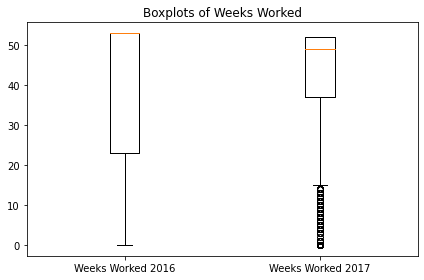

In [4]:
# do a box plot of weeks worked in 2016 and 2017
plt.boxplot([weeksworked.weeksworked16.dropna(),
  weeksworked.weeksworked17.dropna()],
  labels=['Weeks Worked 2016','Weeks Worked 2017'])
plt.title("Boxplots of Weeks Worked")
plt.tight_layout()
plt.show()

In [5]:
 totvars = ['total_cases','total_deaths','total_cases_pm', 'total_deaths_pm']
 totvarslabels = ['cases','deaths','cases per million','deaths per million']
 covidtotalsonly = covidtotals[totvars]
 covidtotalsonly.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
count,2.090000e+02,209.000000,209.000000,209.000000
mean,6.075741e+04,2702.952153,2297.022144,73.636522
std,2.724401e+05,11894.963052,4039.840203,156.341672
min,3.000000e+00,0.000000,1.229000,0.000000
25%,3.420000e+02,9.000000,202.834000,2.809000
50%,2.820000e+03,53.000000,868.866000,15.216000
75%,2.561100e+04,386.000000,2784.865000,58.374000
max,3.247684e+06,134814.000000,35795.159000,1237.551000


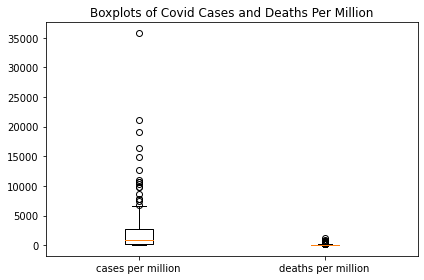

In [6]:
# do a box plot of cases and deaths per million
fig, ax = plt.subplots()
plt.title("Boxplots of Covid Cases and Deaths Per Million")
ax.boxplot([covidtotalsonly.total_cases_pm,covidtotalsonly.total_deaths_pm],\
  labels=['cases per million','deaths per million'])
plt.tight_layout()
plt.show()

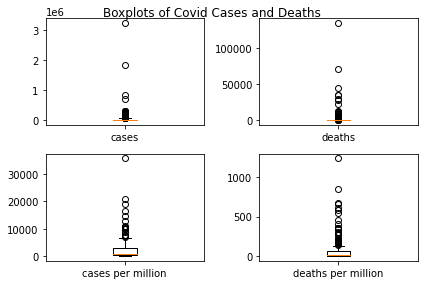

In [7]:
# show boxplots as separate sub plots on one figure
fig, axes = plt.subplots(2, 2,)
fig.suptitle("Boxplots of Covid Cases and Deaths")
axes = axes.ravel()

for j, ax in enumerate(axes):
  ax.boxplot(covidtotalsonly.iloc[:, j], labels=[totvarslabels[j]])

plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()